<a href="https://colab.research.google.com/github/RiaTopre/Cureya-Internship/blob/main/Cureya_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cureya Internship Week 6**

> ### Task Name: Credit Card Fraud Detection
> #### ***Work by: Ria Topre***

#### **Installing required libraries**

In [1]:
!pip install minisom

#### **Import Libraries and the dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
import missingno as msno

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/RiaTopre/Cureya-Internship/main/Credit_Card_Applications(week6).csv')
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [4]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
print('Shape of Dataset : ', df.shape)

Shape of Dataset :  (690, 16)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [7]:
df.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [8]:
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

### **Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

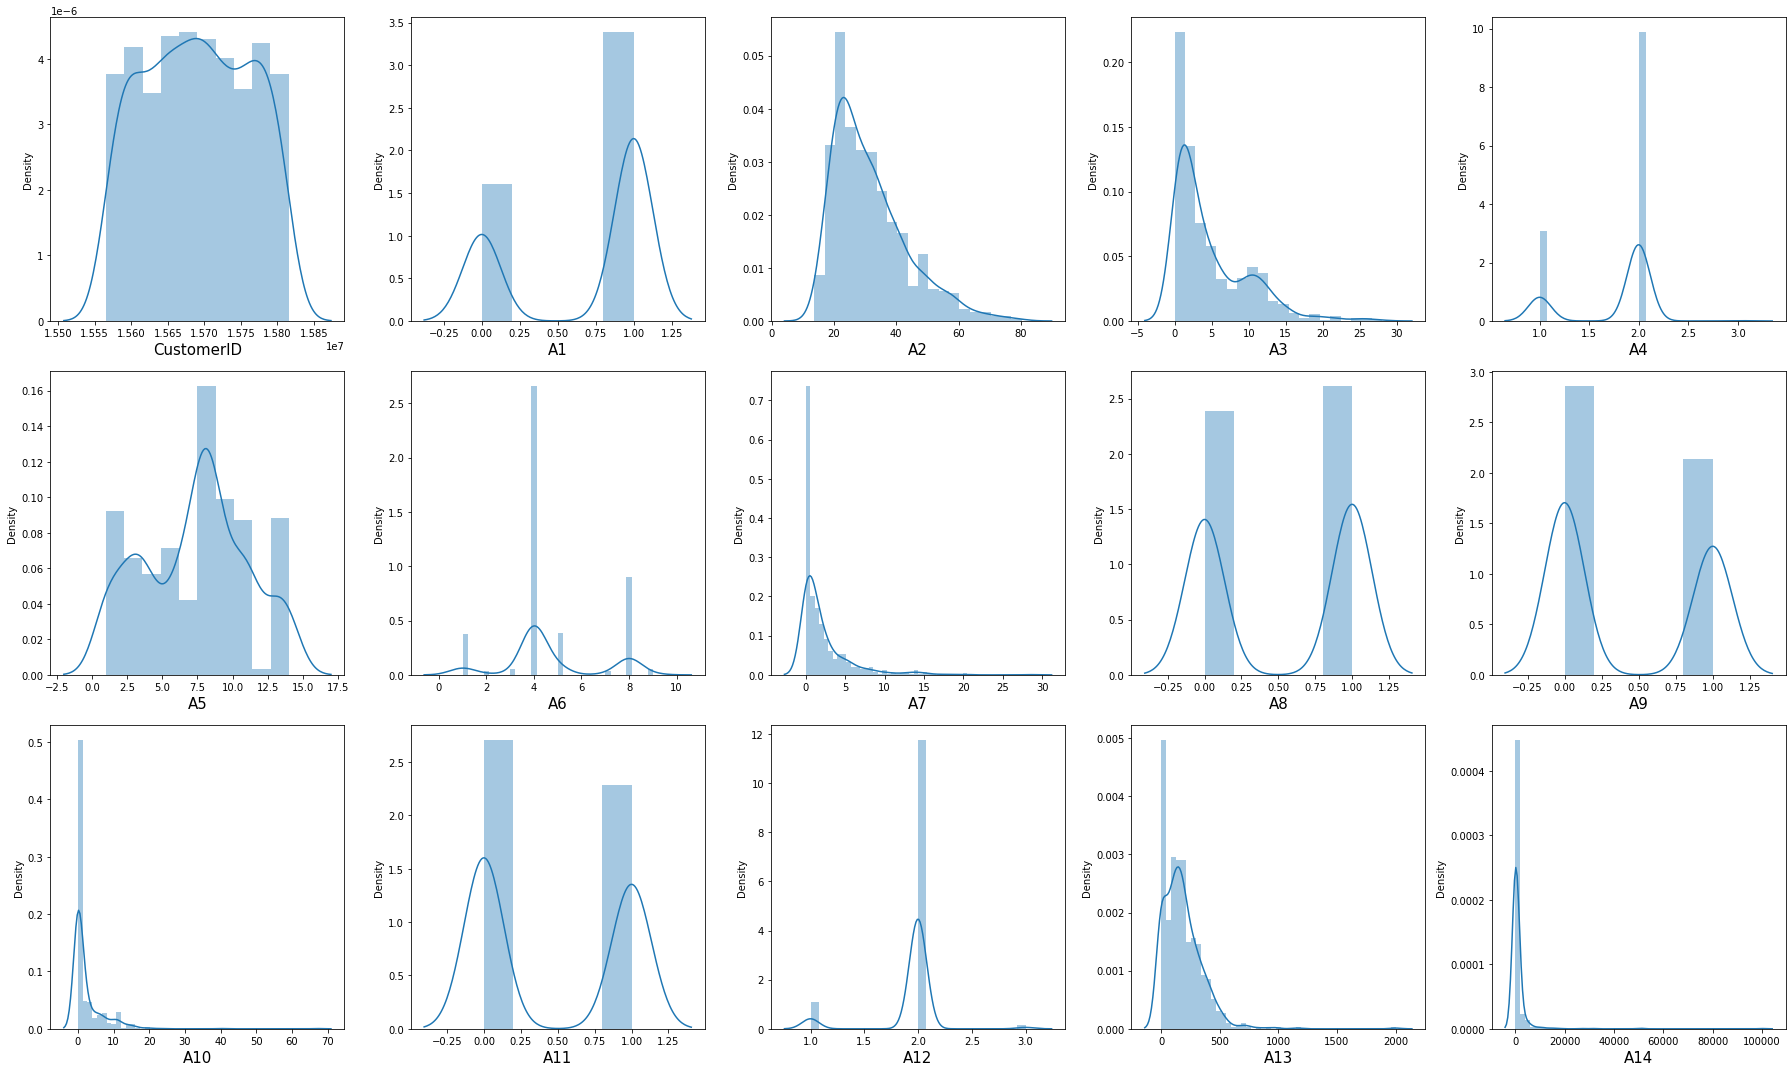

In [9]:
plt.figure(figsize = (25, 15))
plot_no = 1

for column in df:
    if plot_no <= 15:
        ax = plt.subplot(3, 5, plot_no)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    plot_no += 1
    
plt.tight_layout()
plt.show()

- Outlier Detection :

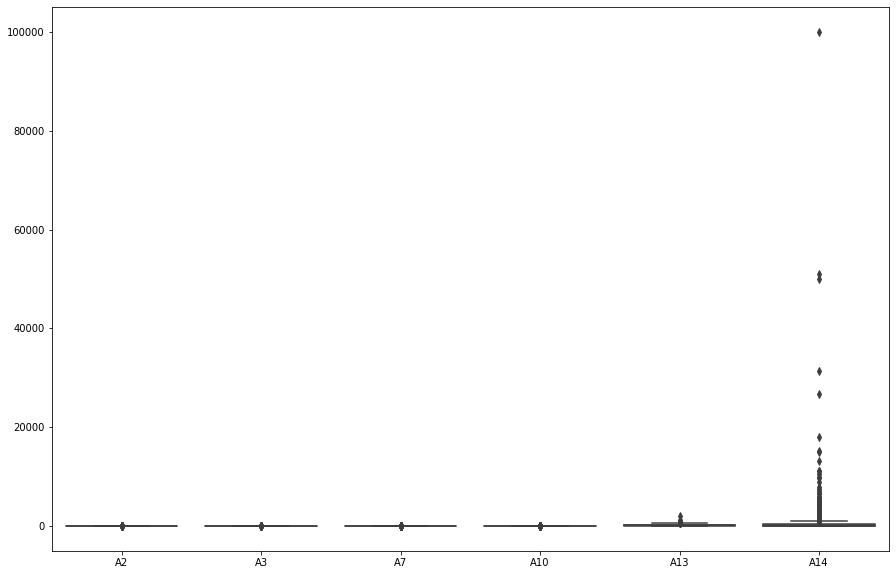

In [10]:
contData = pd.DataFrame()
continousVariableList  = ["A2", "A3", "A7", "A10", "A13", "A14"]
for var in continousVariableList:
    contData[var] = df[var].astype("float32")

fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15, 10)
sns.boxplot(data=contData,orient="v",ax=axes)

- Observations :

1. Majority of our data is out of scale, means have to apply some sort of scaling algorithm before applying any machine learning algorithm.
2. Also, A14 is having huge fluctuations, which could be some sort of indication.

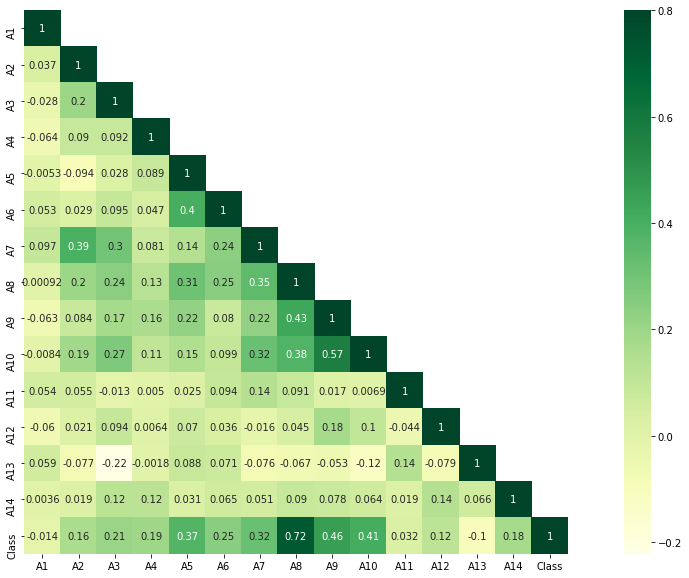

In [11]:
corr = df.iloc[:,1:].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True,cmap="YlGn")

- Observations :

1. There is a high correlation value between A8 feature and the final outcome.

### **Creating the subset of the independent and dependent variable**

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print("\nValues in x:\n", X)
print("\nValues in y:\n", y)


Values in x:
 [[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]

Values in y:
 [0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 

### **Feature Scaling : Normalization**

In [13]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print("\nTransformed values of x:\n", X)


Transformed values of x:
 [[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


- Observations :

1. There are high computations required and the data has many dimensions with lots of non linear relationships. Thus we scale the data to crush the impact of variable with larger weight in the analysis
This method equalizes range and variability in the dataset

### **Training of SOM**

In [14]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### **Visualizing the Result**

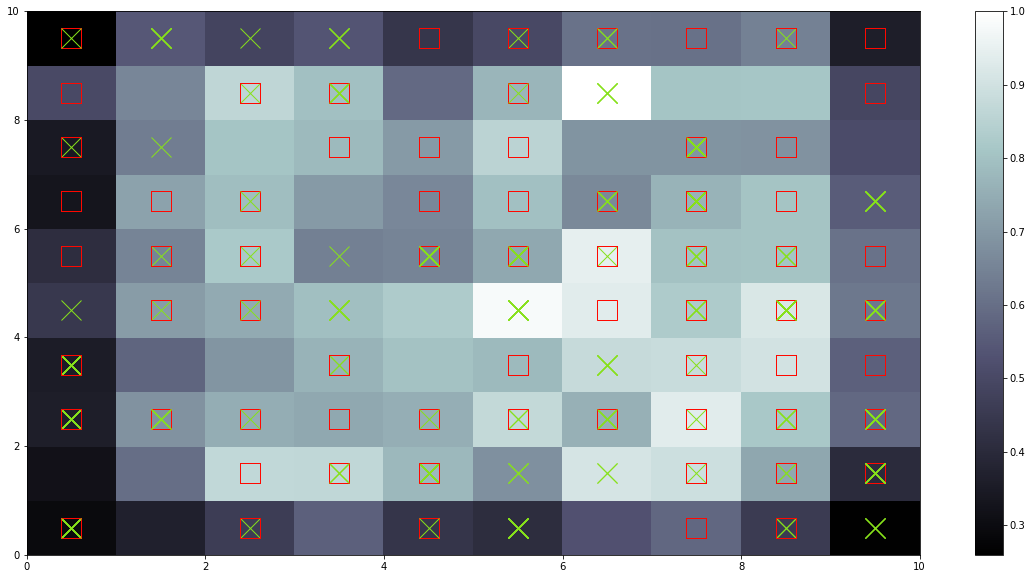

In [15]:
plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['s', 'x']
colors = ['#ff0800', '#87e11b']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 20,
         markeredgewidth = 1)
show()

In [16]:
mappings = som.win_map(X)
print("\nMappings are:\n", mappings)


Mappings are:
 defaultdict(<class 'list'>, {(3, 3): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
       0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.50077484, 1.        , 0.21052632, 0.04607143, 0.5       ,
       0.23076923, 0.875     , 0.00877193, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.07      , 0.        ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
       0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.59371959, 1.        , 0.06766917, 0.00589286, 0.5       ,
       0.07692308, 0.375     , 0.00877193, 0.        , 0.        ,



- Observations :

1. The outlying winning node we recognized from the map was at the position (5,2).
2. Here we get a list of all the customers associated to this WN, i.e all the cheaters.
3. The values are scaled hence its hard to recognize them.

In [18]:
frauds = mappings[(5,2)]
frauds = sc.inverse_transform(frauds)
print("\nFrauds customers are:\n\n",frauds)


Frauds customers are:

 [[1.5599440e+07 1.0000000e+00 5.8580000e+01 2.7100000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 2.4150000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 3.2000000e+02 1.0000000e+00]
 [1.5597709e+07 1.0000000e+00 3.2330000e+01 3.5000000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 5.0000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.3200000e+02 1.0000000e+00]
 [1.5642934e+07 1.0000000e+00 4.3170000e+01 5.0000000e+00 2.0000000e+00
  3.0000000e+00 5.0000000e+00 2.2500000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.4100000e+02 1.0000000e+00]
 [1.5615832e+07 1.0000000e+00 3.4170000e+01 5.2500000e+00 2.0000000e+00
  9.0000000e+00 4.0000000e+00 8.5000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.9000000e+02 7.0000000e+00]
 [1.5594812e+07 1.0000000e+00 3.2330000e+01 2.5000000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 1.250

In [19]:
df_frauds = pd.DataFrame(frauds)
df_frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15599440.0,1.0,58.58,2.710,2.0,8.0,4.0,2.415,0.0,0.0,0.0,1.0,2.0,320.0,1.0
1,15597709.0,1.0,32.33,3.500,2.0,4.0,4.0,0.500,0.0,0.0,0.0,1.0,2.0,232.0,1.0
2,15642934.0,1.0,43.17,5.000,2.0,3.0,5.0,2.250,0.0,0.0,0.0,1.0,2.0,141.0,1.0
3,15615832.0,1.0,34.17,5.250,2.0,9.0,4.0,0.085,0.0,0.0,0.0,1.0,2.0,290.0,7.0
4,15594812.0,1.0,32.33,2.500,2.0,8.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0
5,15681509.0,1.0,47.33,6.500,2.0,8.0,4.0,1.000,0.0,0.0,0.0,1.0,2.0,0.0,229.0
6,15591010.0,1.0,47.83,4.165,2.0,14.0,5.0,0.085,0.0,0.0,0.0,1.0,2.0,520.0,1.0
7,15587266.0,1.0,28.58,3.625,2.0,6.0,4.0,0.250,0.0,0.0,0.0,1.0,2.0,100.0,1.0
8,15567860.0,1.0,38.92,1.750,2.0,4.0,4.0,0.500,0.0,0.0,0.0,1.0,2.0,300.0,3.0
9,15604130.0,1.0,36.67,2.000,2.0,3.0,4.0,0.250,0.0,0.0,0.0,1.0,2.0,221.0,1.0



- Observations :

1. Got the Customer IDs of the cheaters/fraudsters and a list of 16 such people.

In [20]:
customers = df.iloc[:,1:].values
is_fraud = np.zeros(len(df))

for i in range(len(df)):
    if df.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [21]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [22]:
from keras.models import Sequential 
from keras.layers import Dense 

classifier = Sequential()
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)

y_pred = classifier.predict(customers)
y_pred = np.concatenate((df.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1957 - accuracy: 0.9768
Epoch 2/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1357 - accuracy: 0.9768
Epoch 3/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1240 - accuracy: 0.9768
Epoch 4/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1173 - accuracy: 0.9768
Epoch 5/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1146 - accuracy: 0.9768


In [23]:
df1 = pd.DataFrame(y_pred, columns=['Customers','Fraud_probability'])
df1

,Customers,Fraud_probability
0,15790113.0,0.000000e+00
1,15598802.0,0.000000e+00
2,15762716.0,0.000000e+00
3,15664615.0,2.245051e-36
4,15708714.0,1.276314e-31
...,...,...
685,15737627.0,1.169180e-01
686,15735106.0,1.194142e-01
687,15600975.0,1.274358e-01
688,15608916.0,1.338309e-01
